In [1]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import math
import numpy as np

####### Neural Net dependencies ###########
from layers import Dropout, Activation, Dense
from neural_network import NeuralNet
import loss_funcs as loss_funcs
import optimizers as optimizers
from activation_funcs import Sigmoid, ReLU, LeakyReLU, TanH, SoftMax
from data_manipulation import one_hot_encode,shuffle_data,train_test_split
##### Load datasets ##############
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
from sklearn import datasets
data  = datasets.load_digits()

In [2]:
#X = mnist.train.images
#y = np.argmax(mnist.train.labels,axis=1)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, seed=1)

n_samples = np.shape(X)
nhidden_nodes = 512

nmodel = NeuralNet(optimizer = optimizers.Adam(learningRate = 0.02), loss = loss_funcs.CrossEntropy(), validation_data = (X_test,y_test) )
h1_d   = Dense(nhidden_nodes,input_shape=(8*8,))
h1_a   = Activation('sigmoid')
drop   = Dropout(0.25)
out    = Dense(10,input_shape=(nhidden_nodes,))
out_a  = Activation('softmax')


nmodel.addLayer(h1_d)
nmodel.addLayer(h1_a)
nmodel.addLayer(drop)
nmodel.addLayer(out)
nmodel.addLayer(out_a)

train_err,val_err = nmodel.train(X_train, y_train, n_epochs=50, batch_size=256)

100% (50 of 50) |#########################| Elapsed Time: 0:00:06 Time: 0:00:06


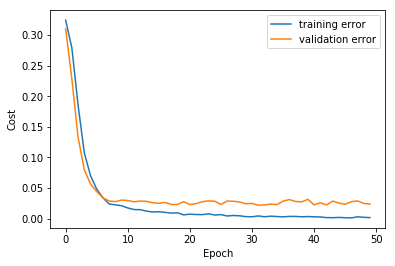

Model Accuracy: 0.977716


In [3]:
plt.plot(train_err)
plt.plot(val_err)
plt.legend(['training error','validation error'])
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

yhat   = nmodel.predict(X_test)
ylabel = np.argmax(yhat,axis=1)
testscore = ylabel == y_test
testscore.astype(int)
print("Model Accuracy: %2f"%(np.sum(testscore)/len(testscore)))

[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.99]


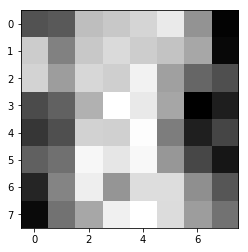

In [4]:
#Not hallucinating correctly
label = 9
y_hallucinate = np.zeros(10)+0.01
y_hallucinate[label] = 0.99
print(y_hallucinate)
x_hallucinate = nmodel.backQuery(y_hallucinate)
plt.imshow(np.reshape(x_hallucinate,(8,8)), cmap='Greys', interpolation='None')
plt.show()